# Circuit CS_R2CL

![](cs_r2cl.svg)

In [1]:
%matplotlib inline

import villas.dataprocessing.readtools as rt
import villas.dataprocessing.plottools as pt
from villas.dataprocessing.timeseries import TimeSeries as ts

## DPsim EMT

In [2]:
# DPsim EMT simulation
import dpsim

name = 'EMT_CS_R2CL'

# Nodes
gnd = dpsim.emt.Node.GND()
n1 = dpsim.emt.Node('n1')
n2 = dpsim.emt.Node('n2')

# Components
cs = dpsim.emt.ph1.CurrentSource('cs')
cs.I_ref = complex(10,0)
cs.f_src = 50
r1 = dpsim.emt.ph1.Resistor('r_1');
r1.R = 1;
c1 = dpsim.emt.ph1.Capacitor('c_1');
c1.C = 0.001;
l1 = dpsim.emt.ph1.Inductor('l_1');
l1.L = 0.001;
r2 = dpsim.emt.ph1.Resistor('r_2');
r2.R = 1;

# Connections
cs.connect([gnd, n1])
r1.connect([n1, gnd])
c1.connect([n1, n2]);
l1.connect([n2, gnd]);
r2.connect([n2, gnd]);

# Define system topology
system = dpsim.SystemTopology(50, [gnd, n1, n2], [cs, r1, c1, l1, r2]);

# Logging
logger = dpsim.Logger(name)
logger.log_attribute(n1, 'v');
logger.log_attribute(n2, 'v');
logger.log_attribute(cs, 'i_intf');
logger.log_attribute(c1, 'i_intf');

sim = dpsim.Simulation(name, system, timestep=0.0001, duration=0.1, pbar=True, sim_type=1)
sim.add_logger(logger)

await sim.simulate()

HTML(value='Simulation start is pending...')

FloatProgress(value=0.0, max=0.1)

In [2]:
# read EMT results
work_dir = 'Logs/'
log_name = 'EMT_CS_R2CL'
print(work_dir + log_name + '.csv')

ts_dpsim_emt = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

Logs/EMT_CS_R2CL.csv
column number: 4
results length: 1000
real column names: ['c_1.i_intf', 'cs.i_intf', 'n1.v', 'n2.v']
complex column names: []


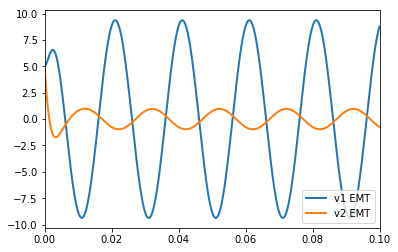

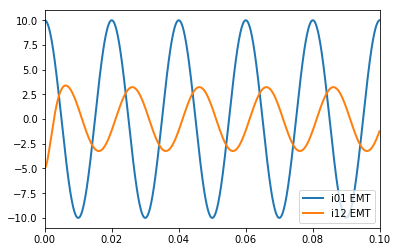

In [3]:
v1_emt = 'n1.v'
v2_emt = 'n2.v'
i01_emt = 'cs.i_intf'
i12_emt = 'c_1.i_intf'

ts_dpsim_emt[v1_emt].label = 'v1 EMT'
ts_dpsim_emt[v2_emt].label = 'v2 EMT'
ts_dpsim_emt[i01_emt].label = 'i01 EMT'
ts_dpsim_emt[i12_emt].label = 'i12 EMT'
pt.plot_timeseries(1, ts_dpsim_emt[v1_emt])
pt.plot_timeseries(1, ts_dpsim_emt[v2_emt])
pt.plot_timeseries(2, ts_dpsim_emt[i01_emt])
pt.plot_timeseries(2, ts_dpsim_emt[i12_emt])

## DPsim DP

In [5]:
# DPsim DP simulation
import dpsim

name = 'DP_CS_R2CL'

# Nodes
gnd = dpsim.dp.Node.GND()
n1 = dpsim.dp.Node('n1')
n2 = dpsim.dp.Node('n2')

# Components
cs = dpsim.dp.ph1.CurrentSource('cs')
cs.I_ref = complex(10,0)
r1 = dpsim.dp.ph1.Resistor('r_1');
r1.R = 1;
c1 = dpsim.dp.ph1.Capacitor('c_1');
c1.C = 0.001;
l1 = dpsim.dp.ph1.Inductor('l_1');
l1.L = 0.001;
r2 = dpsim.dp.ph1.Resistor('r_2');
r2.R = 1;

# Connections
cs.connect([gnd, n1])
r1.connect([n1, gnd])
c1.connect([n1, n2]);
l1.connect([n2, gnd]);
r2.connect([n2, gnd]);

# Define system topology
system = dpsim.SystemTopology(50, [gnd, n1, n2], [cs, r1, c1, l1, r2]);

# Logging
logger = dpsim.Logger(name)
logger.log_attribute(n1, 'v');
logger.log_attribute(n2, 'v');
logger.log_attribute(cs, 'i_intf');
logger.log_attribute(c1, 'i_intf');

sim = dpsim.Simulation(name, system, timestep=0.0001, duration=0.1, pbar=True)
sim.add_logger(logger)

await sim.simulate()

HTML(value='Simulation start is pending...')

FloatProgress(value=0.0, max=0.1)

In [4]:
# read DP results
work_dir = 'Logs/'
log_name = 'DP_CS_R2CL'
print(work_dir + log_name + '.csv')

ts_dpsim_dp = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

#convert to emt
ts_dpsim_dp_emt = ts.frequency_shift_list(ts_dpsim_dp, 50)

Logs/DP_CS_R2CL.csv
column number: 4
results length: 1000
real column names: []
complex column names: ['c_1.i_intf', 'cs.i_intf', 'n1.v', 'n2.v']


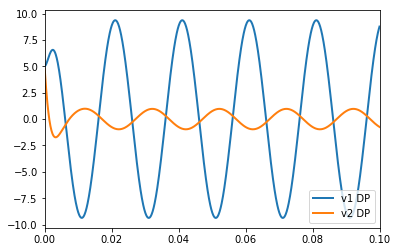

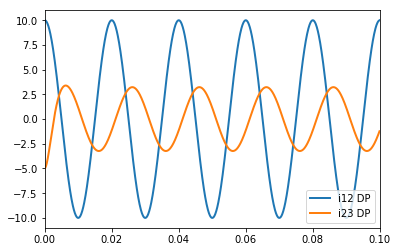

In [5]:
v1_dp = 'n1.v'
v2_dp = 'n2.v'
i01_dp = 'cs.i_intf'
i12_dp = 'c_1.i_intf'

ts_dpsim_dp_emt[v1_dp].label = 'v1 DP'
ts_dpsim_dp_emt[v2_dp].label = 'v2 DP'
ts_dpsim_dp_emt[i01_dp].label = 'i12 DP'
ts_dpsim_dp_emt[i12_dp].label = 'i23 DP'
pt.plot_timeseries(1, ts_dpsim_dp_emt[v1_dp])
pt.plot_timeseries(1, ts_dpsim_dp_emt[v2_dp])
pt.plot_timeseries(2, ts_dpsim_dp_emt[i01_dp])
pt.plot_timeseries(2, ts_dpsim_dp_emt[i12_dp])

## Simulink reference results

In [6]:
# read Simulink log file
work_dir = '../../../build/reference-results/src/reference-results/Simulink/Circuits/'
log_name = 'SL_CS_R2CL'
print(work_dir + log_name + '.csv')

ts_sl = rt.read_timeseries_simulink(work_dir + log_name + '.csv')

../../../build/reference-results/src/reference-results/Simulink/Circuits/SL_CS_R2CL.csv
column number: 4
results length: 1001
real column names: ['v1', 'v2', 'i12', 'i34']
complex column names: []


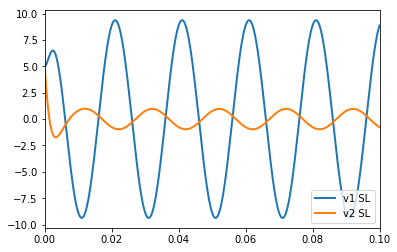

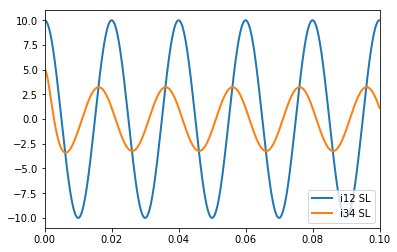

In [7]:
v1_sl = 'v1'
v2_sl = 'v2'
i01_sl = 'i12'
i12_sl = 'i34'

ts_sl[v1_sl].label = 'v1 SL'
ts_sl[v2_sl].label = 'v2 SL'
ts_sl[i01_sl].label = 'i12 SL'
ts_sl[i12_sl].label = 'i34 SL'
pt.plot_timeseries(1, ts_sl[v1_sl])
pt.plot_timeseries(1, ts_sl[v2_sl])
pt.plot_timeseries(2, ts_sl[i01_sl])
pt.plot_timeseries(2, ts_sl[i12_sl])

## Comparison

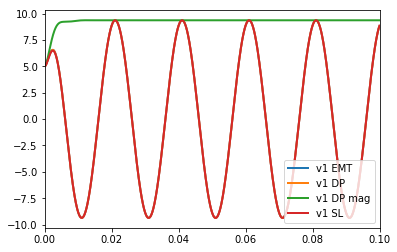

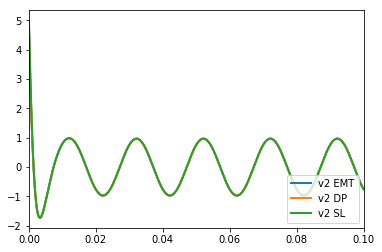

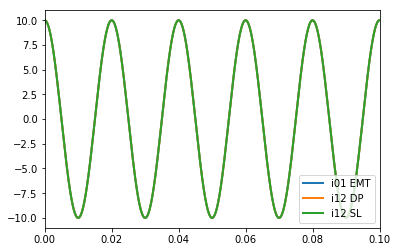

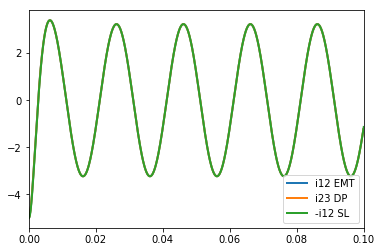

In [8]:
# plot v1
pt.plot_timeseries(1, ts_dpsim_emt[v1_emt])
pt.plot_timeseries(1, ts_dpsim_dp_emt[v1_dp])
pt.plot_timeseries(1, ts_dpsim_dp[v1_dp].abs('v1 DP mag'))
pt.plot_timeseries(1, ts_sl[v1_sl])
# plot v2
pt.plot_timeseries(2, ts_dpsim_emt[v2_emt])
pt.plot_timeseries(2, ts_dpsim_dp_emt[v2_dp])
pt.plot_timeseries(2, ts_sl[v2_sl])
# plot i12
pt.plot_timeseries(5, ts_dpsim_emt[i01_emt])
pt.plot_timeseries(5, ts_dpsim_dp_emt[i01_dp])
pt.plot_timeseries(5, ts_sl[i01_sl])
# plot i34
pt.plot_timeseries(6, ts_dpsim_emt[i12_emt])
pt.plot_timeseries(6, ts_dpsim_dp_emt[i12_dp])
pt.plot_timeseries(6, ts_sl[i12_sl].scale('-i12 SL', -1))

In [9]:
# calculate the RMSE between Simulink (ts_sl) and EMT (ts_dpsim_emt)
err_sl_emt = 0
err_sl_emt += ts.rmse(ts_sl[v1_sl], ts_dpsim_emt[v1_emt])
err_sl_emt += ts.rmse(ts_sl[v2_sl], ts_dpsim_emt[v2_emt])
err_sl_emt = err_sl_emt / 2
print("Total RMSE of Simulink reference and DPsim EMT: %g" % (err_sl_emt))

# calculate the RMSE between Simulink (ts_sl) and DP (ts_dpsim_dp_emt)
err_sl_dp = 0
err_sl_dp += ts.rmse(ts_sl[v1_sl], ts_dpsim_dp_emt[v1_dp])
err_sl_dp += ts.rmse(ts_sl[v2_sl], ts_dpsim_dp_emt[v2_dp])
err_sl_dp = err_sl_dp / 2
print("Total RMSE of Simulink reference and DPsim DP: %g" % (err_sl_dp))

Total RMSE of Simulink reference and DPsim EMT: 0.0170379
Total RMSE of Simulink reference and DPsim DP: 0.0170345
